In [2]:
def RSP_game(my, other):
    if my==other:
      result = 'draw'
    elif ((my=='rock' and other=='scissors') or (my=='scissors' and other =='paper') or (my=='paper' and other=='rock') ):
      result = 'win'
    else:
      result = 'lose'
    return result

In [3]:
game1 = RSP_game(my='rock',other='scissors')
print(game1)

win


In [4]:
import numpy as np

class ENV:
  def __init__(self, my):
    other = np.random.choice(['rock','scissors','paper'], replace = True, size = 1, p=[0.1, 0.8, 0.1])
    self.result = RSP_game(my, other)

In [5]:
game1=ENV(my='paper')
print(game1.result)

lose


In [10]:
import numpy as np
import pandas as pd
num_eps = 10
eps_len = 100
TOT_REWARD_RANDOM = np.zeros(num_eps)
for i in range(num_eps):
  reward = np.zeros(eps_len)
  my = []
  my.clear()
  for t in range(eps_len):
    my.append(np.random.choice(['rock','scissors','paper'], replace = True, size=1).item() )
    game = ENV(my=my[t])
    if game.result == 'win':
      reward[t] = 5
    elif game.result=='draw':
      reward[t]=0
    else:
      reward[t]=-5
    TOT_REWARD_RANDOM[i] = reward.mean()
  data = list(zip(my,reward))
  df = pd.DataFrame(data=data, columns=['my','reward'])


In [11]:
df.head()

,my,reward
0,scissors,0.0
1,rock,5.0
2,scissors,0.0
3,rock,5.0
4,paper,-5.0


In [12]:
df.value_counts()

my        reward
scissors   0.0      35
rock       5.0      26
paper     -5.0      25
           5.0       4
rock       0.0       4
          -5.0       3
scissors   5.0       2
paper      0.0       1
dtype: int64

In [13]:
groups = df.groupby('my')
groups.size()
group_mean = groups.mean()
group_mean

,reward
my,
paper,-3.500000
rock,3.484848
scissors,0.270270


In [14]:
import numpy as np
import pandas as pd
num_eps = 10
eps_len = 100
TOT_REWARD_OPT = np.zeros(num_eps)
for i in range(num_eps):
  reward = np.zeros(eps_len)
  my = []
  my.clear()
  for t in range(eps_len):
    my.append('rock')
    game = ENV(my=my[t])
    if game.result == 'win':
      reward[t] = 5
    elif game.result=='draw':
      reward[t]=0
    else:
      reward[t]=-5
    TOT_REWARD_OPT[i] = reward.mean()
  data = list(zip(my,reward))
  df = pd.DataFrame(data=data, columns=['my','reward'])

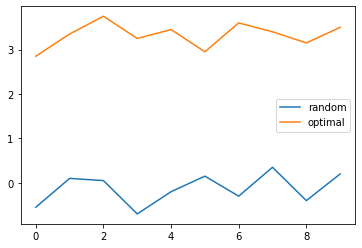

In [15]:
import matplotlib.pyplot as plt
plt.plot(TOT_REWARD_RANDOM)
plt.plot(TOT_REWARD_OPT)
plt.legend(['random','optimal'])